In [7]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [8]:
data = []
labels = []
classes = 43


In [9]:
cd traffic

C:\Users\Yatish\Desktop\traffic


In [10]:
ls

 Volume in drive C is Acer
 Volume Serial Number is CAFB-9ABD

 Directory of C:\Users\Yatish\Desktop\traffic

19-06-2020  17:24    <DIR>          .
19-06-2020  17:24    <DIR>          ..
19-06-2020  16:49       641,568,792 82373_191501_bundle_archive.zip
30-12-2019  01:28             3,855 gui.py
19-06-2020  17:04    <DIR>          Meta
13-10-2019  05:49             1,033 Meta.csv
19-06-2020  17:13         2,958,636 my_model.h5
19-06-2020  17:04    <DIR>          Test
13-10-2019  05:49           427,897 Test.csv
19-06-2020  17:24         2,958,636 traffic_classifier.h5
19-06-2020  16:57    <DIR>          Train
13-10-2019  05:50         1,940,896 Train.csv
               7 File(s)    649,859,745 bytes
               5 Dir(s)  15,156,563,968 bytes free


In [11]:
cur_path = os.getcwd()

In [12]:
cur_path

'C:\\Users\\Yatish\\Desktop\\traffic'

In [13]:
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [14]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


(39209, 30, 30, 3) (39209,)


In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [16]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [18]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [20]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 30s 965us/step - loss: 2.1300 - accuracy: 0.4558 - val_loss: 0.8158 - val_accuracy: 0.7863
Epoch 2/15
31367/31367 [==============================] - 22s 712us/step - loss: 0.9373 - accuracy: 0.7238 - val_loss: 0.3779 - val_accuracy: 0.8971
Epoch 3/15
31367/31367 [==============================] - 23s 726us/step - loss: 0.6269 - accuracy: 0.8117 - val_loss: 0.2701 - val_accuracy: 0.9195
Epoch 4/15
31367/31367 [==============================] - 23s 732us/step - loss: 0.4947 - accuracy: 0.8521 - val_loss: 0.2169 - val_accuracy: 0.9433
Epoch 5/15
31367/31367 [==============================] - 22s 708us/step - loss: 0.4210 - accuracy: 0.8730 - val_loss: 0.1277 - val_accuracy: 0.9625
Epoch 6/15
31367/31367 [==============================] - 23s 726us/step - loss: 0.3656 - accuracy: 0.8899 - val_loss: 0.1144 - val_accuracy: 0.9667
Epoch 7/15
31367/31367 [==============================] -

In [21]:
data.shape

(39209, 30, 30, 3)

In [22]:
model.save("my_model.h5")

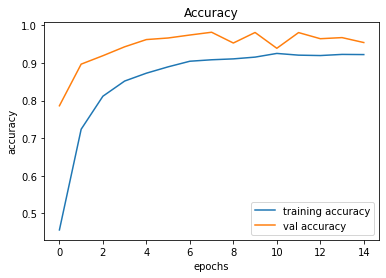

In [23]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


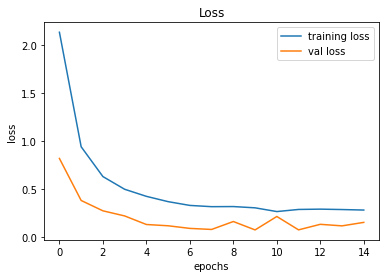

In [24]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [25]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values


In [26]:
data = []
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)

In [27]:
X_test.shape

(12630, 30, 30, 3)

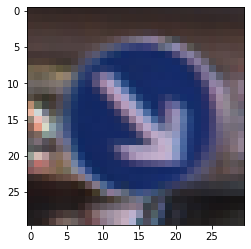

In [28]:
plt.imshow(X_test[2])

In [29]:
predicted = model.predict(X_test)

In [30]:
predicted[0]

array([1.40872903e-23, 2.30808156e-15, 1.13631969e-15, 5.40765315e-15,
       6.31726542e-16, 5.82874693e-20, 8.73641875e-33, 5.79924291e-22,
       1.22432313e-21, 1.29106338e-05, 4.07132921e-18, 7.73228648e-23,
       1.16165317e-14, 4.85626529e-18, 2.16018170e-25, 2.21092892e-13,
       9.99987125e-01, 7.76128281e-29, 1.81789872e-23, 3.00374594e-29,
       4.59451966e-27, 3.25334776e-33, 2.63755200e-37, 5.05937078e-28,
       9.40096341e-31, 5.19798878e-23, 1.27123645e-20, 1.11706008e-24,
       1.47494347e-25, 7.49508841e-27, 1.76881264e-35, 0.00000000e+00,
       3.40554923e-13, 1.96031997e-26, 1.28873209e-26, 3.47834884e-15,
       2.81997652e-26, 4.63372632e-31, 1.15131803e-27, 6.84538321e-31,
       2.41812423e-19, 5.10752678e-18, 2.10607351e-31], dtype=float32)

In [31]:
X = np.expand_dims(X_test[2],axis=0)

In [32]:
X.shape

(1, 30, 30, 3)

In [33]:
predicted = model.predict_classes(X)

In [34]:
predicted

array([38], dtype=int64)

In [35]:
model.save('traffic_classifier.h5')

In [37]:
import pickle
filename = 'traffic_classification.pkl'
model = laod_model('traffic_classifier.h5')

NameError: name 'laod_model' is not defined

In [38]:
pickle.dump(model,open(filename,'wb'))